In [1]:
#Libraries

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# preparing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

# modeling and evaluating
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

# Exploring
import scipy.stats as stats
import math

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

# Add more libraries below this line as needed.

In [2]:
import os
import env
import acquire
import wrangle
import wrangle_zillow_new

credentials loaded successfully
End of file.
Loaded zillow wrangle functions successfully.
Imported prepare.py successfully


# Acquire

In [3]:
df = wrangle.get_zillow_data()
df.shape

(77381, 70)

In [4]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,logerror,pid,tdate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0.025595,14297519,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,0.055619,17052889,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,0.005383,14186244,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,-0.103410,12177905,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,0.006940,10887214,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77381 non-null  float64
 4   heatingorsystemtypeid         49440 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         24953 non-null  float64
 8   id                            77381 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77381 non-null  float64
 11  bedroomcnt                    77381 non-null  float64
 12  buildingqualitytypeid         49672 non-null  float64
 13  c

In [6]:
df.describe()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id.1,logerror,pid
count,7.738100e+04,222.000000,50.0,77381.000000,49440.000000,15.000000,206.000000,24953.000000,7.738100e+04,50.000000,...,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000,77381.000000,7.738100e+04
mean,1.300715e+07,6.040541,7.0,261.826340,3.920510,3.933333,7.388350,1.813289,1.495139e+06,679.720000,...,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,38848.692754,0.016625,1.300715e+07
std,3.481346e+06,0.557285,0.0,5.141199,3.592779,0.258199,2.734542,2.967894,8.609071e+05,689.703546,...,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,22402.429065,0.170191,3.481346e+06
min,1.071186e+07,4.000000,7.0,31.000000,1.000000,3.000000,2.000000,1.000000,3.490000e+02,38.000000,...,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,0.000000,-4.655420,1.071186e+07
25%,1.153830e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,7.520700e+05,273.000000,...,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,19461.000000,-0.024377,1.153830e+07
50%,1.253157e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.497932e+06,515.000000,...,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13,38870.000000,0.006627,1.253157e+07
75%,1.421183e+07,6.000000,7.0,266.000000,7.000000,4.000000,7.000000,1.000000,2.240535e+06,796.500000,...,2.187870e+05,5.690015e+05,2016.0,3.667965e+05,6927.790000,15.000000,6.059042e+13,58253.000000,0.039203,1.421183e+07
max,1.676893e+08,13.000000,7.0,275.000000,24.000000,4.000000,21.000000,13.000000,2.982274e+06,3560.000000,...,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77613.000000,5.262999,1.676893e+08


# Prep

### First step, remove columns that I know I won't be needing

A lot of missing values, however I will remove the columns I don't think I'll be needing first, then address missing rows.

In [7]:
# Dropping columns I don't think I'll need. If I do end up needing them, come back to this point after the MVP is done.

df = wrangle.drop_cols(df)
df.shape

(77381, 50)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77381 non-null  float64
 3   buildingclasstypeid           15 non-null     float64
 4   architecturalstyletypeid      206 non-null    float64
 5   airconditioningtypeid         24953 non-null  float64
 6   basementsqft                  50 non-null     float64
 7   bathroomcnt                   77381 non-null  float64
 8   bedroomcnt                    77381 non-null  float64
 9   decktypeid                    614 non-null    float64
 10  finishedfloor1squarefeet      6023 non-null   float64
 11  calculatedfinishedsquarefeet  77185 non-null  float64
 12  finishedsquarefeet13          41 non-null     float64
 13  f

In [9]:
# I need to isolate down to only single unit properties, which equate to this list:

id_list = [261.0, 260.0, 262.0, 263.0, 264.0]

In [10]:
# Now I have 20k less rows, so good for the most part. Now need to cut down the columns:

df = wrangle.prep_data(df, id_list)
df.shape

(52244, 50)

In [11]:
df = wrangle.handle_missing_values(df, col_limit = .6, row_limit = .6)
df.shape

(52244, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52244 entries, 0 to 77380
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52244 non-null  float64
 1   bathroomcnt                   52244 non-null  float64
 2   bedroomcnt                    52244 non-null  float64
 3   calculatedfinishedsquarefeet  52236 non-null  float64
 4   fips                          52244 non-null  float64
 5   latitude                      52244 non-null  float64
 6   longitude                     52244 non-null  float64
 7   lotsizesquarefeet             51883 non-null  float64
 8   regionidcity                  51216 non-null  float64
 9   roomcnt                       52244 non-null  float64
 10  yearbuilt                     52204 non-null  float64
 11  structuretaxvaluedollarcnt    52172 non-null  float64
 12  taxvaluedollarcnt             52243 non-null  float64
 13  l

In [13]:
# I don't need this column any more.
df.drop(columns = ['propertylandusetypeid'], inplace = True)


In [14]:
df.isna().sum().sort_values(ascending = False)

regionidcity                    1028
lotsizesquarefeet                361
structuretaxvaluedollarcnt        72
yearbuilt                         40
calculatedfinishedsquarefeet       8
taxamount                          4
landtaxvaluedollarcnt              1
taxvaluedollarcnt                  1
logerror                           0
roomcnt                            0
longitude                          0
latitude                           0
fips                               0
bedroomcnt                         0
bathroomcnt                        0
dtype: int64

In [15]:
df = df.dropna()
df.isna().sum().sort_values(ascending = False)

logerror                        0
taxamount                       0
landtaxvaluedollarcnt           0
taxvaluedollarcnt               0
structuretaxvaluedollarcnt      0
yearbuilt                       0
roomcnt                         0
regionidcity                    0
lotsizesquarefeet               0
longitude                       0
latitude                        0
fips                            0
calculatedfinishedsquarefeet    0
bedroomcnt                      0
bathroomcnt                     0
dtype: int64

## Things on my mind:

- Will clustering be beneficial to my understanding of the data and relationships
- Are there new features I can create from my current feature list that will do a better job of predicting `logerror`?

In [16]:
pd.set_option('display.max_columns', 40)

# Adding new dummy columns:

county_df = pd.get_dummies(df.fips)
county_df.head(1)

county_df.columns = ["LA", "Orange", "Ventura"]
# df_dummies = pd.concat([df, county_df], axis = 1)
df = pd.concat([df, county_df], axis = 1)
print(df.shape)
df.head(1)

(50800, 18)


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura
0,3.5,4.0,3100.0,6059.0,33.634931,-117.869207,4506.0,53571.0,0.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0.025595,0,1,0


In [17]:
# adding features:

def create_features(df):
    df['age'] = 2017 - df.yearbuilt

    # create taxrate variable
    df['taxrate'] = df.taxamount/df.taxvaluedollarcnt
    
    # create acres variable
    df['acres'] = df.lotsizesquarefeet/43560
    
    # dollar per square foot-structure
    df['structure_dollar_per_sqft'] = df.structuretaxvaluedollarcnt/df.calculatedfinishedsquarefeet

    # dollar per square foot-land
    df['land_dollar_per_sqft'] = df.landtaxvaluedollarcnt/df.lotsizesquarefeet
    
    # ratio of beds to baths
    df['bed_bath_ratio'] = df.bedroomcnt/df.bathroomcnt
    
    
    
    return df

In [18]:
df = create_features(df)

In [ ]:
sns.scatterplot(x = 'structure_dollar_per_sqft', y = 'fips', data = df)

# Note there are only about 8 outliers that are making the 4th quartile to the max value extremely large compared to the rest of the quartiles.
# These kind of outliers will greatly affect the clustering models. Need to remove them.

In [19]:
# Need to remove outliers because outliers have a very large negative impact on clustering.

def remove_outliers():
    '''
    remove outliers in in structure dollars and land dollars.
    '''

    return df[((df.bathroomcnt <= 7) & (df.bedroomcnt <= 7) &  
               (df.bathroomcnt > 0) & 
               (df.bedroomcnt > 0) & 
               (df.acres < 10) &
               (df.calculatedfinishedsquarefeet < 7000) & 
               (df.taxrate < .05) &
               (df.structure_dollar_per_sqft < 1001) &
               (df.land_dollar_per_sqft < 1501)
              )]

<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='fips'>

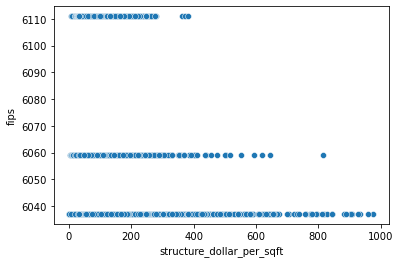

In [20]:
df = remove_outliers()
sns.scatterplot(x = 'structure_dollar_per_sqft', y = 'fips', data = df)

In [ ]:
sns.scatterplot(x = 'land_dollar_per_sqft', y = 'structure_dollar_per_sqft', data = df)

In [ ]:
df.isnull().sum().sort_values(ascending = False)

In [ ]:
df_la = df[df.LA == 1].drop(columns = ['Orange', 'Ventura'])
df_la.shape

In [ ]:
df_o = df[df.Orange == 1].drop(columns = ['LA', 'Ventura'])
df_v = df[df.Ventura == 1].drop(columns = ['Orange', 'LA'])
df_o.shape, df_v.shape

In [ ]:
df_la.head(1)

In [ ]:
# Checking to see the count of fips in each new county df. Making sure there wasn't any leakage between them.

df_la.fips.value_counts(), df_o.fips.value_counts(), df_v.fips.value_counts(),

At this point, I'd want to do everything in triplets, but I think that'll take too long so I'm going to continue using the main dataframe and just add a county column so that I can still divide things by county.

I'll end up with 3 dataframes per county df, which means a total of 9 dataframes... That seems like a bit much, at least for an MVP.

In [ ]:
# I no longer need this column:

# df = df.drop(columns = "propertylandusetypeid")
# df.drop(columns = ['regionidcity', 'regionidcounty', 'unitcnt'], inplace = True)
df.info()

In [ ]:
df.head()

## Splitting Data

In [21]:
train, validate, test = wrangle.split_zillow_data(df)

Shape of train df: (34299, 24)
Shape of validate df: (8575, 24)
Shape of test df: (7567, 24)


In [22]:
# Impute missing values
train.isna().sum().sort_values(ascending = False)

bed_bath_ratio                  0
land_dollar_per_sqft            0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
regionidcity                    0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
LA                              0
Orange                          0
Ventura                         0
age                             0
taxrate                         0
acres                           0
structure_dollar_per_sqft       0
bathroomcnt                     0
dtype: int64

In [23]:
# No need to run this since there are no missing values...

train, validate, test = wrangle.impute_missing_values_all(train, validate, test)
train.head()

# Don't forget to .cut() in this area
# bin by age of house, county, tax bracket, and sq footage for starters

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio
65326,2.0,3.0,1792.0,6059.0,33.634330,-117.649778,5700.0,12773.0,7.0,1977.0,134428.0,285017.0,150589.0,2902.88,0.008833,0,1,0,40.0,0.010185,0.130854,75.015625,26.419123,1.5
39133,1.0,2.0,808.0,6037.0,34.051418,-117.783166,6607.0,20008.0,0.0,1949.0,84258.0,164187.0,79929.0,2117.28,0.034919,1,0,0,68.0,0.012896,0.151676,104.279703,12.097624,2.0
23583,2.0,4.0,1885.0,6037.0,34.668767,-118.217578,9735.0,5534.0,0.0,1994.0,134000.0,252000.0,118000.0,3821.21,-0.002291,1,0,0,23.0,0.015164,0.223485,71.087533,12.121212,2.0
42503,3.0,3.0,2008.0,6059.0,33.467026,-117.626024,11200.0,13693.0,0.0,1987.0,200776.0,775000.0,574224.0,7791.86,0.019921,0,1,0,30.0,0.010054,0.257117,99.988048,51.270000,1.0
3688,1.0,3.0,896.0,6037.0,34.598082,-118.110336,6811.0,40227.0,0.0,1954.0,45716.0,65937.0,20221.0,1504.52,0.180875,1,0,0,63.0,0.022818,0.156359,51.022321,2.968874,3.0


In [24]:
def split(df, target_var):
    # split df into train_validate (80%) and test (20%)
    train_validate, test = train_test_split(df, test_size=.20, random_state=13)
    # split train_validate into train(70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=13)
    
    # create X_train by dropping the target variable 
    X_train = train.drop(columns=[target_var])
    # create y_train by keeping only the target variable.
    y_train = train[[target_var]]

    # create X_validate by dropping the target variable 
    X_validate = validate.drop(columns=[target_var])
    # create y_validate by keeping only the target variable.
    y_validate = validate[[target_var]]

    # create X_test by dropping the target variable 
    X_test = test.drop(columns=[target_var])
    # create y_test by keeping only the target variable.
    y_test = test[[target_var]]
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [25]:
def split_explore(train, validate, test, target_var):
#     # split df into train_validate (80%) and test (20%)
#     train_validate, test = train_test_split(df, test_size=.20, random_state=13)
#     # split train_validate into train(70% of 80% = 56%) and validate (30% of 80% = 24%)
#     train, validate = train_test_split(train_validate, test_size=.3, random_state=13)
    
    # create X_train by dropping the target variable 
    X_train = train.drop(columns=[target_var])
    # create y_train by keeping only the target variable.
    y_train = train[[target_var]]

    # create X_validate by dropping the target variable 
    X_validate = validate.drop(columns=[target_var])
    # create y_validate by keeping only the target variable.
    y_validate = validate[[target_var]]

    # create X_test by dropping the target variable 
    X_test = test.drop(columns=[target_var])
    # create y_test by keeping only the target variable.
    y_test = test[[target_var]]
    
    X_train_explore = train.copy()
    
    return X_train, y_train, X_train_explore, X_validate, y_validate, X_test, y_test

In [26]:
X_train, y_train, X_train_explore, X_validate, y_validate, X_test, y_test = split_explore(train, validate, test, 'logerror')
X_train.shape, X_validate.shape, X_test.shape

((34299, 23), (8575, 23), (7567, 23))

In [27]:
X_train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio
65326,2.0,3.0,1792.0,6059.0,33.634330,-117.649778,5700.0,12773.0,7.0,1977.0,134428.0,285017.0,150589.0,2902.88,0,1,0,40.0,0.010185,0.130854,75.015625,26.419123,1.5
39133,1.0,2.0,808.0,6037.0,34.051418,-117.783166,6607.0,20008.0,0.0,1949.0,84258.0,164187.0,79929.0,2117.28,1,0,0,68.0,0.012896,0.151676,104.279703,12.097624,2.0
23583,2.0,4.0,1885.0,6037.0,34.668767,-118.217578,9735.0,5534.0,0.0,1994.0,134000.0,252000.0,118000.0,3821.21,1,0,0,23.0,0.015164,0.223485,71.087533,12.121212,2.0
42503,3.0,3.0,2008.0,6059.0,33.467026,-117.626024,11200.0,13693.0,0.0,1987.0,200776.0,775000.0,574224.0,7791.86,0,1,0,30.0,0.010054,0.257117,99.988048,51.270000,1.0
3688,1.0,3.0,896.0,6037.0,34.598082,-118.110336,6811.0,40227.0,0.0,1954.0,45716.0,65937.0,20221.0,1504.52,1,0,0,63.0,0.022818,0.156359,51.022321,2.968874,3.0


In [28]:
X_train.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
regionidcity                    0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
LA                              0
Orange                          0
Ventura                         0
age                             0
taxrate                         0
acres                           0
structure_dollar_per_sqft       0
land_dollar_per_sqft            0
bed_bath_ratio                  0
dtype: int64

In [29]:
def scale_min_max():
    # create the scaler object and fit to X_train (get the min and max from X_train for each column)
    scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(X_train)

    # transform X_train values to their scaled equivalent and create df of the scaled features
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), 
                                  columns=X_train.columns.values).set_index([X_train.index.values])
    
    # transform X_validate values to their scaled equivalent and create df of the scaled features
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate),
                                    columns=X_validate.columns.values).set_index([X_validate.index.values])

    # transform X_test values to their scaled equivalent and create df of the scaled features   
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                                 columns=X_test.columns.values).set_index([X_test.index.values])
    
    # scaling the explore df:
    scaler_explore = MinMaxScaler(copy=True, feature_range=(0,1)).fit(X_train_explore)
    X_train_explore_scaled = pd.DataFrame(scaler_explore.transform(X_train_explore), 
                                  columns=X_train_explore.columns.values).set_index([X_train_explore.index.values])
    
    return X_train_scaled, X_validate_scaled, X_test_scaled, X_train_explore_scaled

In [30]:
X_train_scaled, X_validate_scaled, X_test_scaled, X_train_explore_scaled = scale_min_max()

In [78]:
X_train_explore_scaled.logerror

65326    0.595606
39133    0.598937
23583    0.594185
42503    0.597022
3688     0.617575
           ...   
54707    0.593474
36655    0.610984
21424    0.602742
19929    0.597218
10541    0.590073
Name: logerror, Length: 34299, dtype: float64

In [32]:
X_train.describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio
count,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,3.429900e+04,3.429900e+04,3.429900e+04,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000
mean,2.274192,3.294644,1885.970378,6049.275343,34.021082,-118.193384,9438.183650,33431.882475,1.926966,1962.979533,1.852668e+05,5.035614e+05,3.182947e+05,6120.459819,0.644013,0.270533,0.085454,54.020467,0.013194,0.216671,89.436299,47.969129,1.605203
std,0.951544,0.907532,890.040850,21.171090,0.273186,0.356431,14801.960872,49230.761787,3.162849,22.712418,1.962002e+05,5.866930e+05,4.425662e+05,6728.424622,0.478818,0.444241,0.279561,22.712418,0.003058,0.339806,55.951004,69.535025,0.564169
min,1.000000,1.000000,152.000000,6037.000000,33.340851,-119.475265,236.000000,3491.000000,0.000000,1878.000000,1.480000e+02,1.168300e+04,2.250000e+03,49.180000,0.000000,0.000000,0.000000,1.000000,0.000094,0.005418,0.039833,0.048926,0.333333
25%,2.000000,3.000000,1269.000000,6037.000000,33.826565,-118.397165,5560.500000,12447.000000,0.000000,1950.000000,7.686000e+04,1.913710e+05,7.416650e+04,2624.360000,0.000000,0.000000,0.000000,39.000000,0.011636,0.127652,54.655496,9.346617,1.250000
50%,2.000000,3.000000,1650.000000,6037.000000,34.020691,-118.150357,6822.000000,24812.000000,0.000000,1960.000000,1.300280e+05,3.698530e+05,2.164390e+05,4592.220000,1.000000,0.000000,0.000000,57.000000,0.012323,0.156612,81.485714,30.371550,1.500000
75%,3.000000,4.000000,2270.000000,6059.000000,34.186479,-117.928278,8719.000000,40227.000000,5.000000,1978.000000,2.203840e+05,6.091500e+05,4.060290e+05,7226.365000,1.000000,1.000000,0.000000,67.000000,0.013665,0.200161,112.177342,59.982137,2.000000
max,7.000000,7.000000,6995.000000,6111.000000,34.806955,-117.572338,435267.000000,396556.000000,14.000000,2016.000000,3.545994e+06,2.538125e+07,2.233550e+07,288524.600000,1.000000,1.000000,1.000000,139.000000,0.049812,9.992355,975.870007,1454.724936,5.000000


In [80]:
X_train_explore_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34299 entries, 65326 to 10541
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   bathroomcnt                            34299 non-null  float64
 1   bedroomcnt                             34299 non-null  float64
 2   calculatedfinishedsquarefeet           34299 non-null  float64
 3   fips                                   34299 non-null  float64
 4   latitude                               34299 non-null  float64
 5   longitude                              34299 non-null  float64
 6   lotsizesquarefeet                      34299 non-null  float64
 7   regionidcity                           34299 non-null  float64
 8   roomcnt                                34299 non-null  float64
 9   yearbuilt                              34299 non-null  float64
 10  structuretaxvaluedollarcnt             34299 non-null  float64
 11

## End of prep:

- All missing values accounted for
- All columns still in dataframe are ones I need for analysis
- Data not yet scaled, need to accomplish this before moving on with rest of Explore stage

## *Outliers still need to be dealt with after the MVP is complete*

# Explore Stage

- Based on Faith's advice for the MVP, I will be exploring based upon unscaled train, validate, and test data.
- However, when it comes time to model, I'll need to scale the data. I would prefer to have that step completed at end of prep, so will add scaling section here
### y_train ==  `logerror`

In [34]:
# RFE:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Assessing the RFE using a linear regression model
lm = LinearRegression()

rfe = RFE(lm, 5)

lm_X_rfe = rfe.fit_transform(X_train,y_train) 


## Here we want to filter through and return only the best features
mask = rfe.support_ 
rfe_features = X_train.columns[mask]
print(f'selected {len(rfe_features)} features:', ', '.join(rfe_features))

selected 5 features: fips, LA, Orange, Ventura, taxrate


In [35]:
# Now using KBest:

In [36]:
from sklearn.feature_selection import SelectKBest, f_regression

In [37]:
f_selector = SelectKBest(f_regression, k=5)

# we are running the scaled train data through kbest
f_selector = f_selector.fit(X_train_scaled, y_train.logerror)

X_train_reduced = f_selector.transform(X_train_scaled)
print(X_train.shape)
print(X_train_reduced.shape)

f_support = f_selector.get_support()

f_feature = X_train_scaled.iloc[:, f_support].columns.tolist()
f_feature

(34299, 23)
(34299, 5)


['bedroomcnt',
 'calculatedfinishedsquarefeet',
 'LA',
 'Orange',
 'structure_dollar_per_sqft']

In [ ]:
# For a simple visual answer, I'm going to use a scatterplot, with logerror being the value.

sns.scatterplot(x = 'calculatedfinishedsquarefeet', y = 'logerror', data = train, hue = 'fips')

In [ ]:
sns.scatterplot(x = 'latitude', y = 'logerror', data = train, hue = 'fips')

In [ ]:
sns.relplot(x="longitude", y="latitude", hue="fips", data=train)

In [ ]:
sns.relplot(x="longitude", y="latitude", hue="structure_dollar_per_sqft", data=train)

In [ ]:
# Are there any features that I want to create from the existing data? Any I want to take away?
# First let's check the distributions of the existing cleaned columns:

In [ ]:
# separating by county
# Adding back a county column to the train df in order to viz the counties:
train_viz = train.copy()

# converting fips code to int. Will need to convert to string if I import into Tableau.
train_viz['fips'] = train_viz['fips'].astype('int')

conditions = [
    (train_viz['fips'] == 6037),
    (train_viz['fips'] == 6059),
    (train_viz['fips'] == 6111)
    ]

county_list = ['Los Angeles', 'Orange', 'Ventura']

train_viz['county'] = np.select(conditions, county_list)
train_viz.shape
sns.relplot(x="longitude", y="latitude", hue="county", data=train_viz)

## Can I visualize any significant relationship between logerror and any of my current features?

In [ ]:
# I'm not seeing any... And if I can't find any, not sure what to test or model on...

sns.catplot(x = 'fips', y = 'logerror', data = train)

In [ ]:
# What should I bit? How effective would that be? Let's run histograms to see what the distributions are:

In [38]:
type_vars = ['bedroomcnt', 'bathroomcnt', 'age']

def elbow_plot(cluster_vars):
    # elbow method to identify good k for us
    ks = range(2,20)
    
    # empty list to hold inertia (sum of squares)
    sse = []

    # loop through each k, fit kmeans, get inertia
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X_train[cluster_vars])
        # inertia
        sse.append(kmeans.inertia_)

    print(pd.DataFrame(dict(k=ks, sse=sse)))

    # plot k with inertia
    plt.plot(ks, sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('Elbow method to find optimal k')
    plt.show()

     k           sse
0    2  6.227256e+06
1    3  2.864098e+06
2    4  1.610696e+06
3    5  1.096393e+06
4    6  7.983386e+05
5    7  5.795556e+05
6    8  4.495939e+05
7    9  3.612173e+05
8   10  3.002390e+05
9   11  2.498335e+05
10  12  2.274786e+05
11  13  2.112574e+05
12  14  1.851126e+05
13  15  1.771140e+05
14  16  1.591334e+05
15  17  1.469286e+05
16  18  1.333271e+05
17  19  1.289900e+05


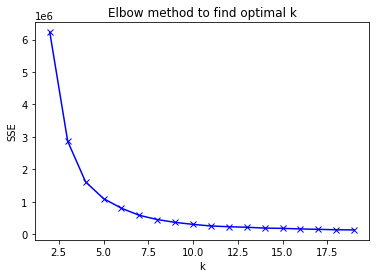

In [39]:
elbow_plot(cluster_vars = type_vars)

In [ ]:
# Based on this is seems like 4-5 centroids is the optimal number of clusters for our data.

### Questions:

- Do I need to bin anything?
- What is the average tax rate per county?
- combine tax amount and square feet by county and compare

In [40]:

k = 5

def run_kmeans(k, cluster_vars, cluster_col_name):
    # create kmeans object
    kmeans = KMeans(n_clusters = k, random_state = 13)
    kmeans.fit(X_train_scaled[cluster_vars])
    # predict and create a dataframe with cluster per observation
    train_clusters = \
        pd.DataFrame(kmeans.predict(X_train_scaled[cluster_vars]),
                              columns=[cluster_col_name],
                              index=X_train.index)
    
    return train_clusters, kmeans

In [41]:
# I'm going to try the ones that returned as best from the RFE:

train_clusters, kmeans = run_kmeans(k=5, cluster_vars = ['bedroomcnt', 'bathroomcnt', 'age'], cluster_col_name = 'type_cluster')

In [42]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio
65326,0.166667,0.333333,0.239661,0.297297,0.200176,0.959305,0.012560,0.023614,0.5,0.717391,0.037870,0.010774,0.006642,0.009892,0.0,1.0,0.0,0.282609,0.202970,0.012560,0.076833,0.018128,0.250000
39133,0.000000,0.166667,0.095864,0.000000,0.484663,0.889209,0.014645,0.042021,0.0,0.514493,0.023721,0.006011,0.003478,0.007169,1.0,0.0,0.0,0.485507,0.257489,0.014645,0.106822,0.008283,0.357143
23583,0.166667,0.500000,0.253251,0.000000,0.905745,0.660922,0.021835,0.005198,0.0,0.840580,0.037749,0.009473,0.005183,0.013076,1.0,0.0,0.0,0.159420,0.303107,0.021835,0.072807,0.008299,0.357143
42503,0.333333,0.333333,0.271226,0.297297,0.086061,0.971788,0.025203,0.025955,0.0,0.789855,0.056581,0.030088,0.025611,0.026840,0.0,1.0,0.0,0.210145,0.200336,0.025203,0.102424,0.035211,0.142857
3688,0.000000,0.333333,0.108724,0.000000,0.857532,0.717279,0.015114,0.093460,0.0,0.550725,0.012851,0.002139,0.000805,0.005045,1.0,0.0,0.0,0.449275,0.457056,0.015114,0.052245,0.002007,0.571429


In [43]:
train_clusters.type_cluster.value_counts()

2    10671
0     7144
1     7111
4     6675
3     2698
Name: type_cluster, dtype: int64

In [44]:
# Getting the centroids

centroid_col_names = ['centroid_' + i for i in type_vars]
centroid_col_names

centroids = pd.DataFrame(kmeans.cluster_centers_, 
             columns=centroid_col_names).reset_index().rename(columns={'index': 'type_cluster'})

centroids

,type_cluster,centroid_bedroomcnt,centroid_bathroomcnt,centroid_age
0,0,0.230190,0.026569,0.565394
1,1,0.529978,0.240242,0.417137
2,2,0.308831,0.184299,0.415167
3,3,0.626456,0.558240,0.204504
4,4,0.407066,0.286517,0.178495


In [45]:

# concatenate cluster id
X_train = pd.concat([X_train, train_clusters], axis=1)

# join on clusterid to get centroids
X_train = X_train.merge(centroids, how='left', on='type_cluster').\
                set_index(X_train.index)

In [46]:
# concatenate cluster id
X_train_scaled = pd.concat([X_train_scaled, train_clusters], 
                           axis=1)

# join on clusterid to get centroids
X_train_scaled = X_train_scaled.merge(centroids, how='left', on='type_cluster').\
                set_index(X_train.index)

     k           sse
0    2  9.710406e+09
1    3  5.064501e+09
2    4  3.089615e+09
3    5  2.068301e+09
4    6  1.479251e+09
5    7  1.106610e+09
6    8  8.588655e+08
7    9  6.850387e+08
8   10  5.571270e+08
9   11  4.645180e+08
10  12  3.930322e+08
11  13  3.360234e+08
12  14  2.879020e+08
13  15  2.505185e+08
14  16  2.188751e+08
15  17  1.982931e+08
16  18  1.810563e+08
17  19  1.615919e+08


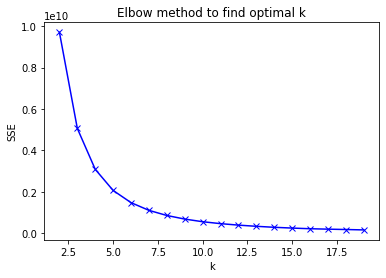

In [47]:
cluster_vars = ['calculatedfinishedsquarefeet', 'acres', 'taxrate']
elbow_plot(cluster_vars)

In [48]:
train_clusters, kmeans = run_kmeans(k=4, 
                                    cluster_vars = cluster_vars, 
                                    cluster_col_name = 'size_cluster')

In [49]:
def get_centroids(cluster_vars, cluster_col_name):
    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroids = pd.DataFrame(kmeans.cluster_centers_, 
             columns=centroid_col_names).reset_index().rename(columns={'index': cluster_col_name})
    
    return centroids

In [50]:
centroids = get_centroids(cluster_vars, cluster_col_name='size_cluster')

In [65]:
def add_to_train(cluster_col_name):
    # concatenate cluster id
    X_train2 = pd.concat([X_train, train_clusters], axis=1)

    # join on clusterid to get centroids
    X_train2 = X_train2.merge(centroids, how='left', 
                            on=cluster_col_name).\
                        set_index(X_train.index)
    
    # concatenate cluster id
    X_train_scaled2 = pd.concat([X_train_scaled, train_clusters], 
                               axis=1)

    # join on clusterid to get centroids
    X_train_scaled2 = X_train_scaled2.merge(centroids, how='left', 
                                          on=cluster_col_name).\
                            set_index(X_train.index)
    
    return X_train2, X_train_scaled2

In [52]:

X_train, X_train_scaled = add_to_train(cluster_col_name = 'size_cluster')

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34299 entries, 65326 to 10541
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   bathroomcnt                            34299 non-null  float64
 1   bedroomcnt                             34299 non-null  float64
 2   calculatedfinishedsquarefeet           34299 non-null  float64
 3   fips                                   34299 non-null  float64
 4   latitude                               34299 non-null  float64
 5   longitude                              34299 non-null  float64
 6   lotsizesquarefeet                      34299 non-null  float64
 7   regionidcity                           34299 non-null  float64
 8   roomcnt                                34299 non-null  float64
 9   yearbuilt                              34299 non-null  float64
 10  structuretaxvaluedollarcnt             34299 non-null  float64
 11

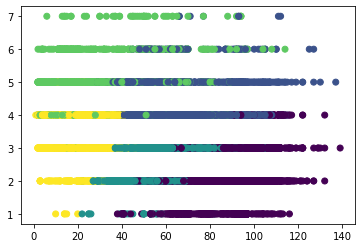

In [54]:
plt.scatter(X_train.age, X_train.bedroomcnt, c=X_train.type_cluster)
plt.show()

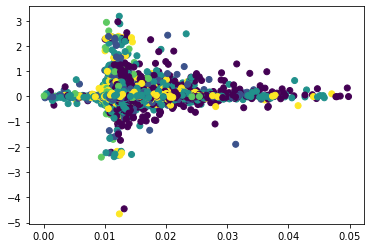

In [55]:
plt.scatter(X_train.taxrate, y_train.logerror, c=X_train.type_cluster)
plt.show()

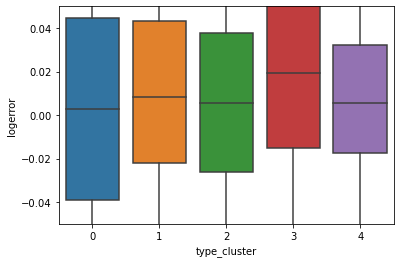

In [56]:
sns.boxplot(X_train.type_cluster, y_train.logerror)
plt.ylim(-.05,.05)
plt.show()

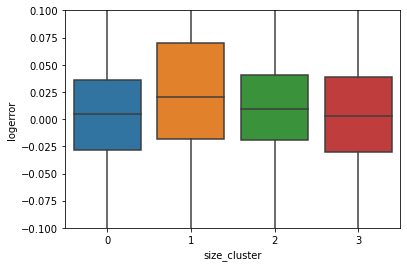

In [57]:
sns.boxplot(X_train.size_cluster, y_train.logerror)
plt.ylim(-.10, .10)
plt.show()

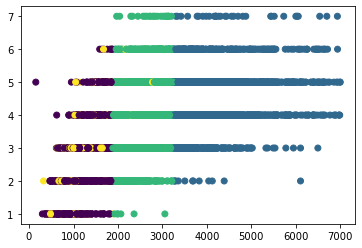

In [58]:

plt.scatter(X_train.calculatedfinishedsquarefeet, X_train.bedroomcnt, c=X_train.size_cluster)
plt.show()

In [59]:
X_train_scaled.type_cluster.value_counts()

2    10671
0     7144
1     7111
4     6675
3     2698
Name: type_cluster, dtype: int64

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34299 entries, 65326 to 10541
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   bathroomcnt                            34299 non-null  float64
 1   bedroomcnt                             34299 non-null  float64
 2   calculatedfinishedsquarefeet           34299 non-null  float64
 3   fips                                   34299 non-null  float64
 4   latitude                               34299 non-null  float64
 5   longitude                              34299 non-null  float64
 6   lotsizesquarefeet                      34299 non-null  float64
 7   regionidcity                           34299 non-null  float64
 8   roomcnt                                34299 non-null  float64
 9   yearbuilt                              34299 non-null  float64
 10  structuretaxvaluedollarcnt             34299 non-null  float64
 11

In [61]:
X_train.shape, y_train.shape

((34299, 31), (34299, 1))

In [69]:
def add_to_train_explore(cluster_col_name):
    
    # concatenate cluster id
    X_train_scaled_e2 = pd.concat([X_train_explore_scaled, train_clusters], 
                               axis=1)

    # join on clusterid to get centroids
    X_train_scaled_e2 = X_train_scaled_e2.merge(centroids, how='left', 
                                          on=cluster_col_name).\
                            set_index(X_train_explore.index)
    
    return X_train_scaled_e2

In [70]:
X_train_scaled.shape

(34299, 31)

In [75]:
X_train_explore_scaled = add_to_train_explore(cluster_col_name = 'size_cluster')

In [82]:
X_train_explore_scaled.shape
X_train_explore_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34299 entries, 65326 to 10541
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   bathroomcnt                            34299 non-null  float64
 1   bedroomcnt                             34299 non-null  float64
 2   calculatedfinishedsquarefeet           34299 non-null  float64
 3   fips                                   34299 non-null  float64
 4   latitude                               34299 non-null  float64
 5   longitude                              34299 non-null  float64
 6   lotsizesquarefeet                      34299 non-null  float64
 7   regionidcity                           34299 non-null  float64
 8   roomcnt                                34299 non-null  float64
 9   yearbuilt                              34299 non-null  float64
 10  structuretaxvaluedollarcnt             34299 non-null  float64
 11

In [88]:
X_train_explore_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,size_cluster,centroid_calculatedfinishedsquarefeet,centroid_acres,centroid_taxrate
65326,0.166667,0.333333,0.239661,0.297297,0.200176,0.959305,0.012560,0.023614,0.5,0.717391,0.037870,0.010774,0.006642,0.009892,0.595606,0.0,1.0,0.0,0.282609,0.202970,0.012560,0.076833,0.018128,0.250000,0,0.175238,0.016366,0.251135
39133,0.000000,0.166667,0.095864,0.000000,0.484663,0.889209,0.014645,0.042021,0.0,0.514493,0.023721,0.006011,0.003478,0.007169,0.598937,1.0,0.0,0.0,0.485507,0.257489,0.014645,0.106822,0.008283,0.357143,0,0.175238,0.016366,0.251135
23583,0.166667,0.500000,0.253251,0.000000,0.905745,0.660922,0.021835,0.005198,0.0,0.840580,0.037749,0.009473,0.005183,0.013076,0.594185,1.0,0.0,0.0,0.159420,0.303107,0.021835,0.072807,0.008299,0.357143,2,0.328465,0.024820,0.247279
42503,0.333333,0.333333,0.271226,0.297297,0.086061,0.971788,0.025203,0.025955,0.0,0.789855,0.056581,0.030088,0.025611,0.026840,0.597022,0.0,1.0,0.0,0.210145,0.200336,0.025203,0.102424,0.035211,0.142857,2,0.328465,0.024820,0.247279
3688,0.000000,0.333333,0.108724,0.000000,0.857532,0.717279,0.015114,0.093460,0.0,0.550725,0.012851,0.002139,0.000805,0.005045,0.617575,1.0,0.0,0.0,0.449275,0.457056,0.015114,0.052245,0.002007,0.571429,3,0.177334,0.015742,0.409030


### Hypothesis Test:

##### Features: `age` and `structure_dollar_per_sqft`

$H_0$: The population means for the 5 clusters are all equal (**no** significant difference)

$H_a$: The population means for the 5 clusters are not equal (there **is** a significant difference)

In [84]:
# Running an ANOVA test for all 5 clusters that used the KMeans form of clustering. 
# Recall that for KMeans I have to use scaled data because it is so sensitive to outliers.

alpha = .05

cluster_one = X_train_explore_scaled[X_train_explore_scaled.size_cluster == 0].logerror
cluster_two = X_train_explore_scaled[X_train_explore_scaled.size_cluster == 1].logerror
cluster_three = X_train_explore_scaled[X_train_explore_scaled.size_cluster == 2].logerror
cluster_four = X_train_explore_scaled[X_train_explore_scaled.size_cluster == 3].logerror
cluster_five = X_train_explore_scaled[X_train_explore_scaled.size_cluster == 4].logerror

In [89]:
cluster_one

65326    0.595606
39133    0.598937
40673    0.592139
1893     0.600984
13936    0.594820
           ...   
59039    0.595325
3514     0.592911
54707    0.593474
21424    0.602742
19929    0.597218
Name: logerror, Length: 18104, dtype: float64

In [90]:
# The test:

import scipy.stats as stats

f, p = stats.f_oneway(cluster_one, cluster_two, cluster_three, cluster_four, cluster_five)
f, p

(nan, nan)

In [86]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject null hypothesis")

We fail to reject null hypothesis


In [ ]:
# going to try all columns:

# Creating a dataframe for a more managable heatmap
# corr_eval_df = train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet', 'regionidcity', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxvaluedollarcnt', 'taxamount', 'age', 'taxrate', 'acres', 'structure_dollar_per_sqft', 'land_dollar_per_sqft', 'bed_bath_ratio', 'county', 'logerror']]
corr_eval_df = train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'age', 'taxrate', 'acres', 'structure_dollar_per_sqft', 'land_dollar_per_sqft', 'bed_bath_ratio', 'logerror']]

# Code for the heatmap itself:
corr = corr_eval_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Takeaways:
- Right now the highest correlation is `fullbathcnt` and `age`
- But none of these features actually are over the limit of .2 or -.2 to become remotely "significant"

This correlation matrix usually provides some hints as to which features are statistically correlated to the target variable, ie `logerror` in this case...

Still, I need to take whatever the MOST significant features are and go with those... at least for the MVP

In [ ]:
# So log error is higher in orange county...? Interesting.

# What types of houses are predominant in Orange county? Low priced, high priced, normal "family" priced homes?

# Is the model worse at predicting middle income type homes, and better at the outliers?



# Clustering

In [95]:
from sklearn.cluster import KMeans

In [96]:

# Fit K-Means
X = X_train_scaled[["age", "structure_dollar_per_sqft"]]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

X_train_scaled['cluster'] = kmeans.labels_
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,size_cluster,centroid_calculatedfinishedsquarefeet,centroid_acres,centroid_taxrate,cluster
65326,0.166667,0.333333,0.239661,0.297297,0.200176,0.959305,0.012560,0.023614,0.5,0.717391,0.037870,0.010774,0.006642,0.009892,0.595606,0.0,1.0,0.0,0.282609,0.202970,0.012560,0.076833,0.018128,0.250000,0,0.175238,0.016366,0.251135,0
39133,0.000000,0.166667,0.095864,0.000000,0.484663,0.889209,0.014645,0.042021,0.0,0.514493,0.023721,0.006011,0.003478,0.007169,0.598937,1.0,0.0,0.0,0.485507,0.257489,0.014645,0.106822,0.008283,0.357143,0,0.175238,0.016366,0.251135,1
23583,0.166667,0.500000,0.253251,0.000000,0.905745,0.660922,0.021835,0.005198,0.0,0.840580,0.037749,0.009473,0.005183,0.013076,0.594185,1.0,0.0,0.0,0.159420,0.303107,0.021835,0.072807,0.008299,0.357143,2,0.328465,0.024820,0.247279,4
42503,0.333333,0.333333,0.271226,0.297297,0.086061,0.971788,0.025203,0.025955,0.0,0.789855,0.056581,0.030088,0.025611,0.026840,0.597022,0.0,1.0,0.0,0.210145,0.200336,0.025203,0.102424,0.035211,0.142857,2,0.328465,0.024820,0.247279,0
3688,0.000000,0.333333,0.108724,0.000000,0.857532,0.717279,0.015114,0.093460,0.0,0.550725,0.012851,0.002139,0.000805,0.005045,0.617575,1.0,0.0,0.0,0.449275,0.457056,0.015114,0.052245,0.002007,0.571429,3,0.177334,0.015742,0.409030,1


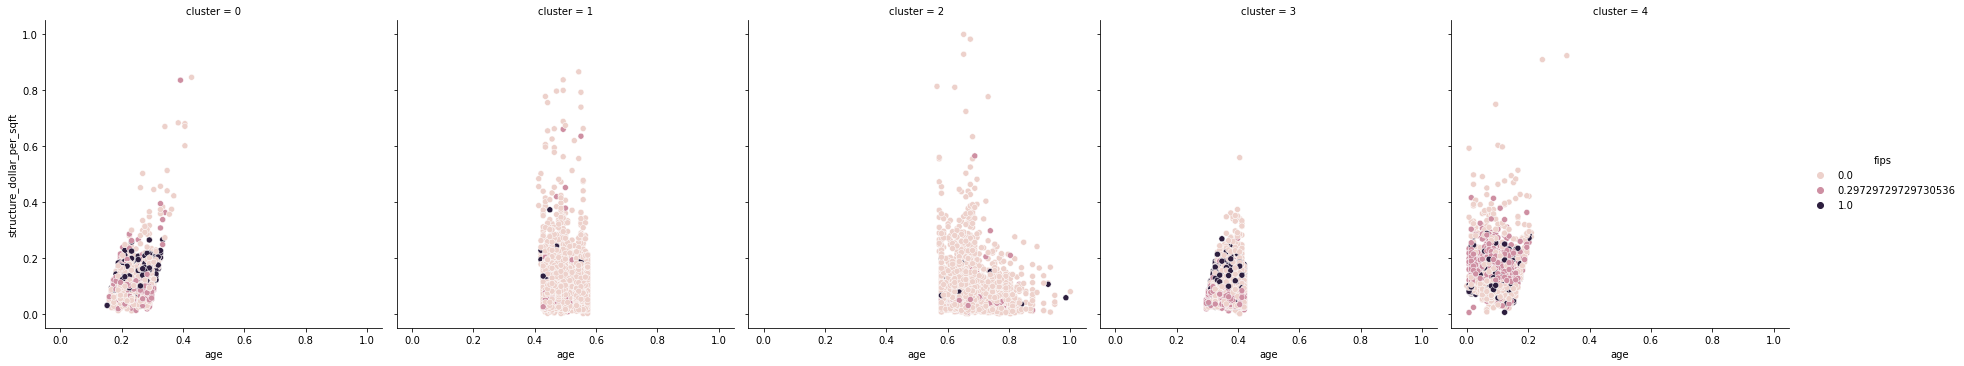

In [97]:
# visualize w/ hue="species" style="cluster"
sns.relplot(x="age", y="structure_dollar_per_sqft", hue="fips", col="cluster", data=X_train_scaled)

In [98]:
X = X_train_scaled[['age', 'land_dollar_per_sqft']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

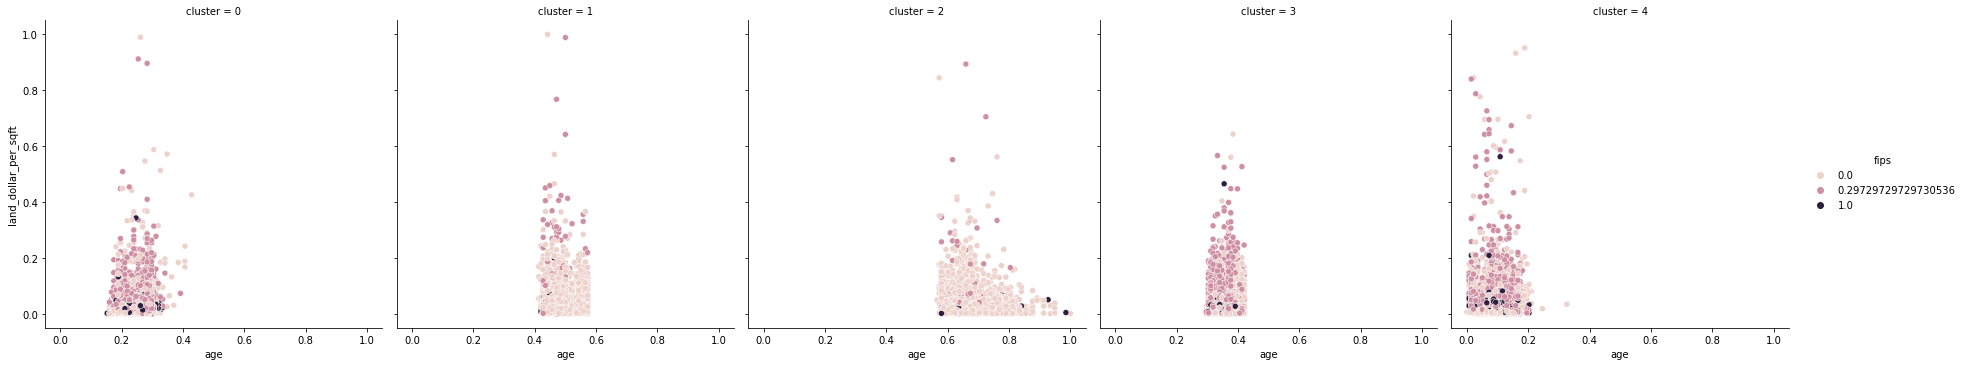

In [99]:

# visualize w/ hue="species" style="cluster"
sns.relplot(x="age", y="land_dollar_per_sqft", hue="fips", col="cluster", data=X_train_scaled)

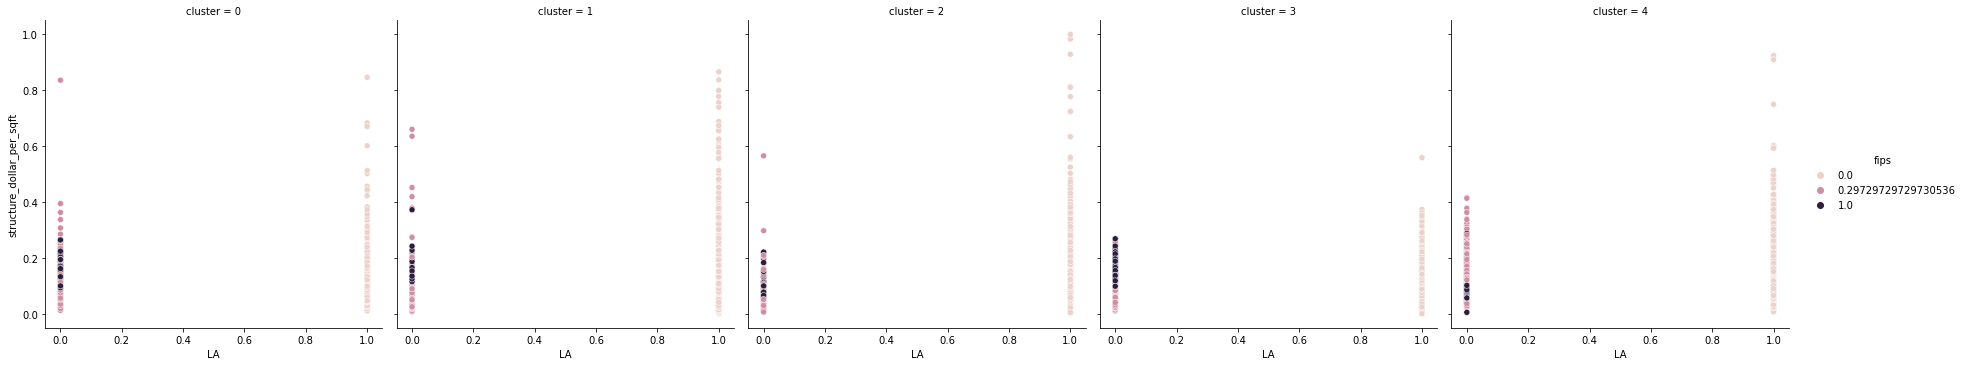

In [100]:
# visualize w/ hue="species" style="cluster"
sns.relplot(x="LA", y="structure_dollar_per_sqft", hue="fips", col="cluster", data=X_train_scaled)

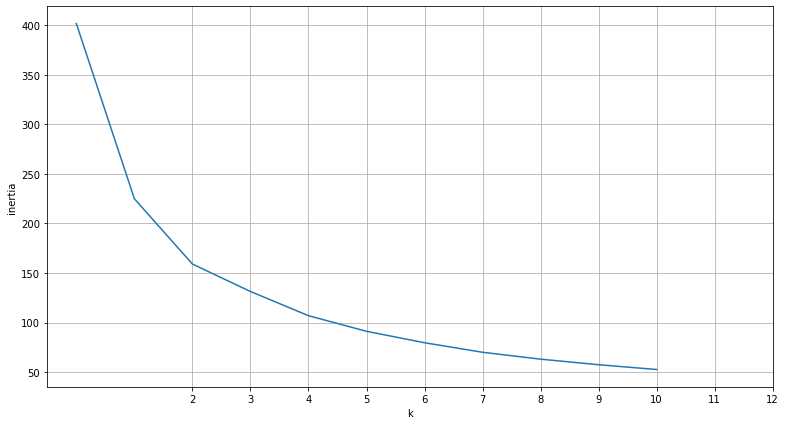

In [101]:
def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))

df = pd.Series([get_inertia(k) for k in range(2, 13)]).plot()

plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [102]:
# It appears that the best number of centroids is around 4-5. So I'll try that again.

In [103]:
# Scale the datasets
scaler = MinMaxScaler()
cols = train.drop(columns=["logerror"]).columns.tolist()

# .copy() makes a proper copy
train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.transform(validate[cols])
test_scaled[cols] = scaler.transform(test[cols])

In [104]:
# Fit K-Means
X2 = train_scaled[["age", "structure_dollar_per_sqft"]]
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(X2)

train_scaled['cluster'] = kmeans2.labels_
train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,cluster
65326,0.166667,0.333333,0.239661,0.297297,0.200176,0.959305,0.012560,0.023614,0.5,0.717391,0.037870,0.010774,0.006642,0.009892,0.008833,0.0,1.0,0.0,0.282609,0.202970,0.012560,0.076833,0.018128,0.250000,4
39133,0.000000,0.166667,0.095864,0.000000,0.484663,0.889209,0.014645,0.042021,0.0,0.514493,0.023721,0.006011,0.003478,0.007169,0.034919,1.0,0.0,0.0,0.485507,0.257489,0.014645,0.106822,0.008283,0.357143,3
23583,0.166667,0.500000,0.253251,0.000000,0.905745,0.660922,0.021835,0.005198,0.0,0.840580,0.037749,0.009473,0.005183,0.013076,-0.002291,1.0,0.0,0.0,0.159420,0.303107,0.021835,0.072807,0.008299,0.357143,1
42503,0.333333,0.333333,0.271226,0.297297,0.086061,0.971788,0.025203,0.025955,0.0,0.789855,0.056581,0.030088,0.025611,0.026840,0.019921,0.0,1.0,0.0,0.210145,0.200336,0.025203,0.102424,0.035211,0.142857,4
3688,0.000000,0.333333,0.108724,0.000000,0.857532,0.717279,0.015114,0.093460,0.0,0.550725,0.012851,0.002139,0.000805,0.005045,0.180875,1.0,0.0,0.0,0.449275,0.457056,0.015114,0.052245,0.002007,0.571429,3


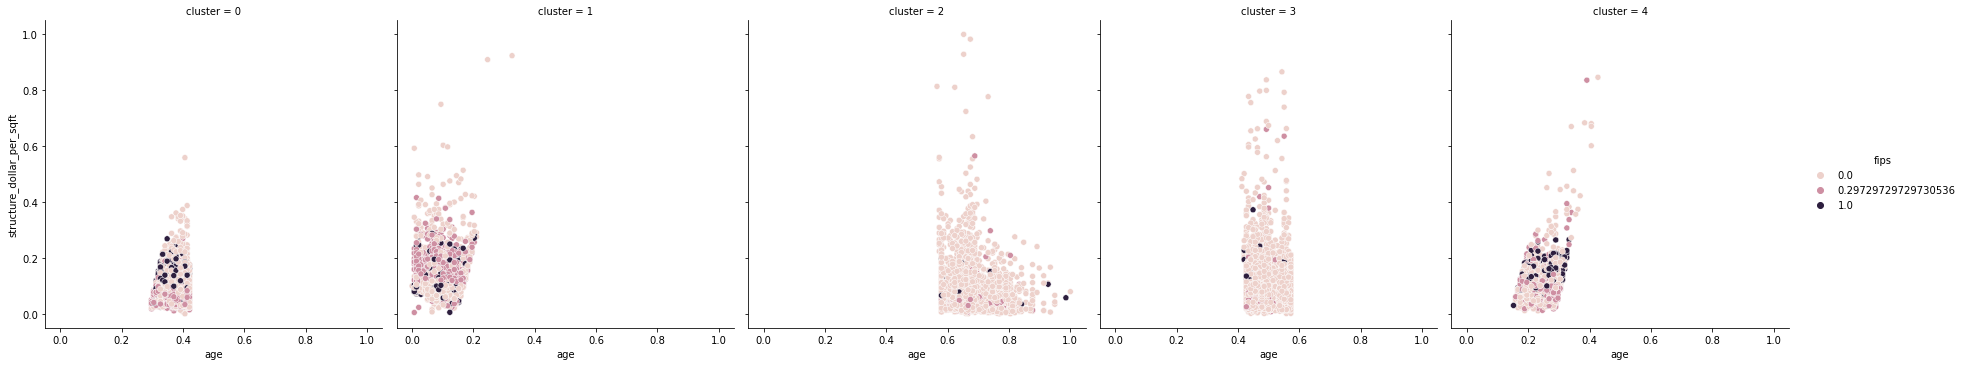

In [105]:
# visualize w/ hue="species" style="cluster"
sns.relplot(x="age", y="structure_dollar_per_sqft", hue="fips", col="cluster", data=train_scaled)

In [106]:
pd.DataFrame(kmeans2.cluster_centers_, columns=X2.columns)

,age,structure_dollar_per_sqft
0,0.370280,0.077254
1,0.105622,0.136784
2,0.674168,0.085606
3,0.477153,0.080843
4,0.240668,0.104470


In [107]:
X2.shape, kmeans2.labels_.shape

((34299, 2), (34299,))

In [108]:
train_scaled['cluster'] = kmeans2.labels_
train_scaled.groupby('cluster').mean()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio
cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,0.221463,0.423843,0.249052,0.244500,0.428864,0.676227,0.019943,0.067793,0.258162,0.629626,0.040402,0.016347,0.012571,0.017526,0.024519,0.466406,0.411403,0.122191,0.370374,0.254841,0.019943,0.077270,0.029487,0.268527
1,0.384005,0.487502,0.400810,0.292596,0.471625,0.698740,0.025574,0.067153,0.112233,0.894178,0.115255,0.034698,0.021532,0.037624,0.020645,0.392874,0.447601,0.159525,0.105822,0.265021,0.025574,0.136785,0.050871,0.195985
2,0.111973,0.293139,0.201161,0.036833,0.468856,0.642753,0.016299,0.079390,0.027149,0.325502,0.039324,0.018911,0.015655,0.020720,0.008123,0.923928,0.055840,0.020232,0.674498,0.269013,0.016299,0.085263,0.039012,0.329219
3,0.142805,0.329511,0.197574,0.056343,0.470797,0.657874,0.018832,0.091277,0.058506,0.522736,0.035443,0.015430,0.012316,0.017246,0.014244,0.861482,0.116940,0.021577,0.477264,0.273421,0.018832,0.080932,0.026803,0.313441
4,0.275473,0.408231,0.296041,0.259511,0.491383,0.702025,0.027238,0.062756,0.209829,0.759097,0.064644,0.020803,0.013784,0.021825,0.018555,0.473448,0.380020,0.146532,0.240903,0.251673,0.027238,0.104387,0.033320,0.217659


<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='age'>

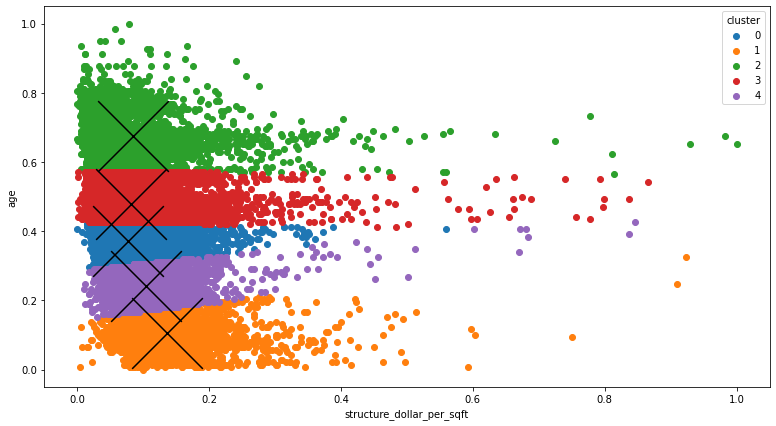

In [109]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train_scaled.groupby('cluster'):
    ax.scatter(subset.structure_dollar_per_sqft, subset.age, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='age', xlabel='struture value')

train_scaled.groupby('cluster').mean().plot.scatter(y='age', x='structure_dollar_per_sqft', marker='x', s=5000, ax=ax, c='black')

#### This is an interesting result 

It seems like the clustering actually did a pretty decent job of clustering by location data... and incidentally, when I ran the correlation matrix, location information was the most correlated than the other features... still not significantly so, but more so than the other features.

### Hypothesis Test:

##### Features: `age` and `structure_dollar_per_sqft`

$H_0$: The population means for the 5 clusters are all equal (**no** significant difference)

$H_a$: The population means for the 5 clusters are not equal (there **is** a significant difference)

In [110]:
# Running an ANOVA test for all 5 clusters that used the KMeans form of clustering. 
# Recall that for KMeans I have to use scaled data because it is so sensitive to outliers.

alpha = .05

cluster_one = train_scaled[train_scaled.cluster == 0].logerror
cluster_two = train_scaled[train_scaled.cluster == 1].logerror
cluster_three = train_scaled[train_scaled.cluster == 2].logerror
cluster_four = train_scaled[train_scaled.cluster == 3].logerror
cluster_five = train_scaled[train_scaled.cluster == 4].logerror

In [111]:
# The test:

import scipy.stats as stats

f, p = stats.f_oneway(cluster_one, cluster_two, cluster_three, cluster_four, cluster_five)
f, p

(7.451370375854687, 5.392017102881161e-06)

In [112]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject null hypothesis")

We reject the null hypothesis


## Breakthrough:

- It appears as though the `age` and `structure_dollar_per_sqft` independent variables' variance are at least statistically significant.
- Now I'm going to try two more different combinations of features in order to get the MVP done.
- I want to try using DBSCAN in order to see if that does a better job of clustering than KMeans

In [113]:
# Scale the datasets
scaler3 = MinMaxScaler()
cols3 = train.drop(columns=["logerror"]).columns.tolist()

# .copy() makes a proper copy
train_scaled3 = train.copy()
validate_scaled3 = validate.copy()
test_scaled3 = test.copy()

train_scaled3[cols3] = scaler3.fit_transform(train[cols3])
validate_scaled3[cols3] = scaler3.transform(validate[cols3])
test_scaled3[cols3] = scaler3.transform(test[cols3])

In [114]:
# Fit K-Means
X3 = train_scaled3[["latitude", "longitude"]]
kmeans3 = KMeans(n_clusters=4)
kmeans3.fit(X3)

train_scaled3['cluster'] = kmeans3.labels_
train_scaled3.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,cluster
65326,0.166667,0.333333,0.239661,0.297297,0.200176,0.959305,0.012560,0.023614,0.5,0.717391,0.037870,0.010774,0.006642,0.009892,0.008833,0.0,1.0,0.0,0.282609,0.202970,0.012560,0.076833,0.018128,0.250000,0
39133,0.000000,0.166667,0.095864,0.000000,0.484663,0.889209,0.014645,0.042021,0.0,0.514493,0.023721,0.006011,0.003478,0.007169,0.034919,1.0,0.0,0.0,0.485507,0.257489,0.014645,0.106822,0.008283,0.357143,2
23583,0.166667,0.500000,0.253251,0.000000,0.905745,0.660922,0.021835,0.005198,0.0,0.840580,0.037749,0.009473,0.005183,0.013076,-0.002291,1.0,0.0,0.0,0.159420,0.303107,0.021835,0.072807,0.008299,0.357143,3
42503,0.333333,0.333333,0.271226,0.297297,0.086061,0.971788,0.025203,0.025955,0.0,0.789855,0.056581,0.030088,0.025611,0.026840,0.019921,0.0,1.0,0.0,0.210145,0.200336,0.025203,0.102424,0.035211,0.142857,0
3688,0.000000,0.333333,0.108724,0.000000,0.857532,0.717279,0.015114,0.093460,0.0,0.550725,0.012851,0.002139,0.000805,0.005045,0.180875,1.0,0.0,0.0,0.449275,0.457056,0.015114,0.052245,0.002007,0.571429,3


In [115]:
train_scaled3.cluster.value_counts()

2    15503
0     8306
1     8045
3     2445
Name: cluster, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

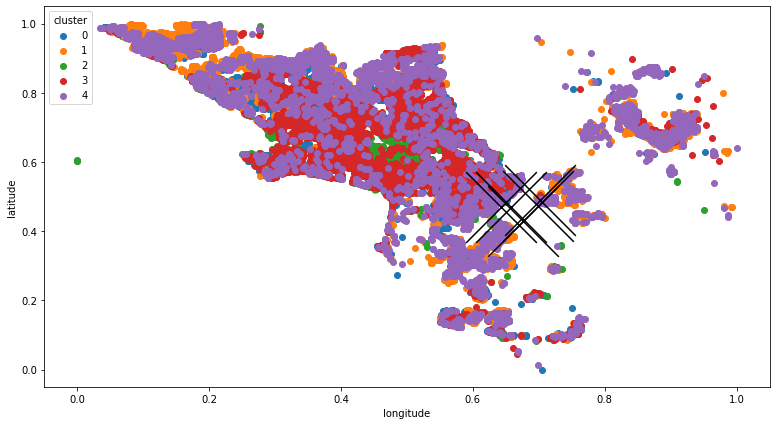

In [116]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train_scaled.groupby('cluster'):
    ax.scatter(subset.latitude, subset.longitude, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='age', xlabel='struture value')

train_scaled.groupby('cluster').mean().plot.scatter(y='latitude', x='longitude', marker='x', s=5000, ax=ax, c='black')

No use whatever in grouping this way. 

In [117]:
# Try to find a place where the logerror is particularly high or low. Is it in a specific fips code? Or specific bathroom count? Or specific city ID?

In [119]:
# Scale the datasets
scaler4 = MinMaxScaler()
cols4 = train.drop(columns=["logerror"]).columns.tolist()

# .copy() makes a proper copy
train_scaled4 = train.copy()
validate_scaled4 = validate.copy()
test_scaled4 = test.copy()

train_scaled4[cols4] = scaler4.fit_transform(train[cols4])
validate_scaled4[cols4] = scaler4.transform(validate[cols4])
test_scaled4[cols4] = scaler4.transform(test[cols4])

In [120]:
# Fit K-Means
X4 = train_scaled4[["bed_bath_ratio", "land_dollar_per_sqft"]]
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X4)

train_scaled4['cluster'] = kmeans4.labels_
train_scaled4.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,cluster
65326,0.166667,0.333333,0.239661,0.297297,0.200176,0.959305,0.012560,0.023614,0.5,0.717391,0.037870,0.010774,0.006642,0.009892,0.008833,0.0,1.0,0.0,0.282609,0.202970,0.012560,0.076833,0.018128,0.250000,1
39133,0.000000,0.166667,0.095864,0.000000,0.484663,0.889209,0.014645,0.042021,0.0,0.514493,0.023721,0.006011,0.003478,0.007169,0.034919,1.0,0.0,0.0,0.485507,0.257489,0.014645,0.106822,0.008283,0.357143,2
23583,0.166667,0.500000,0.253251,0.000000,0.905745,0.660922,0.021835,0.005198,0.0,0.840580,0.037749,0.009473,0.005183,0.013076,-0.002291,1.0,0.0,0.0,0.159420,0.303107,0.021835,0.072807,0.008299,0.357143,2
42503,0.333333,0.333333,0.271226,0.297297,0.086061,0.971788,0.025203,0.025955,0.0,0.789855,0.056581,0.030088,0.025611,0.026840,0.019921,0.0,1.0,0.0,0.210145,0.200336,0.025203,0.102424,0.035211,0.142857,3
3688,0.000000,0.333333,0.108724,0.000000,0.857532,0.717279,0.015114,0.093460,0.0,0.550725,0.012851,0.002139,0.000805,0.005045,0.180875,1.0,0.0,0.0,0.449275,0.457056,0.015114,0.052245,0.002007,0.571429,0


In [121]:
train_scaled4.cluster.value_counts()

1    15193
3     8528
2     7913
0     2665
Name: cluster, dtype: int64

<AxesSubplot:xlabel='land_dollar_per_sqft', ylabel='bed_bath_ratio'>

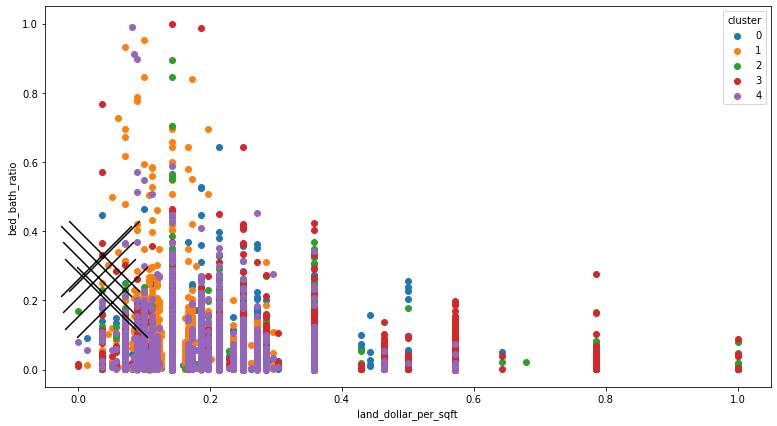

In [122]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train_scaled.groupby('cluster'):
    ax.scatter(subset.bed_bath_ratio, subset.land_dollar_per_sqft, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='age', xlabel='struture value')

train_scaled.groupby('cluster').mean().plot.scatter(y='bed_bath_ratio', x='land_dollar_per_sqft', marker='x', s=5000, ax=ax, c='black')

Again, not a useful grouping at all. So useless in fact, that I'm not even going to spend time doing any hypothesis tests on this in the interest of time left to complete the MVP.

# Exploring Clusters

In [ ]:

sns.scatterplot(x='longitude', y='latitude', hue='age', data=X_train)
plt.title("Lat with Lon and Age...can we see any good info here? ")
plt.show()

In [ ]:
def run_kmeans(k, cluster_vars, cluster_col_name):
    # create kmeans object
    kmeans = KMeans(n_clusters = k, random_state = 13)
    kmeans.fit(X_train_scaled[cluster_vars])
    # predict and create a dataframe with cluster per observation
    train_clusters = \
        pd.DataFrame(kmeans.predict(X_train_scaled[cluster_vars]),
                              columns=[cluster_col_name],
                              index=X_train.index)
    
    return train_clusters, kmeans

In [ ]:
train_clusters, kmeans_fit = run_kmeans(k = 5, cluster_vars = ['age', 'calculatedfinishedsquarefeet', 'structure_dollar_per_sqft'], cluster_col_name = "area_cluster")

In [ ]:
X_train_scaled.head()

# Modeling - MVP Style

In [123]:
lm = LinearRegression()

In [124]:
X_train_scaled.shape

(34299, 29)

In [125]:
train_scaled4.shape, train_scaled3.shape

((34299, 25), (34299, 25))

In [126]:
# Calculating Baseline:

# Mean Value
np.mean(y_train)
y_train.shape

(34299, 1)

In [128]:
# np.full modiefies shape turns value in to a full series object
baseline_rmse = mean_squared_error(y_train, np.full(y_train.shape[0], np.mean(y_train)))**(1/2)
print (f'The baseline_rmse is {baseline_rmse}')  # Model Error To Beat 0.16287423418470207

The baseline_rmse is 0.17535873868681826
